<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Day1.do.txt --no_mako -->
<!-- dom:TITLE: Linear Regression, from ordinary least squares to Ridge and Lasso regression -->

# Linear Regression, from ordinary least squares to Ridge and Lasso regression
**Morten Hjorth-Jensen**, Department of Physics and Center for Computing in Science Education, University of Oslo, Norway and Department of Physics and Astronomy and Facility for Rare Isotope Beams, Michigan State University, USA

Date: **October 2, 2023**

## Plans for week 40, October 2-6

The main topics are:

1. Brief repetition from last week

2. Derivation of the equations for ordinary least squares

3. Discussion on how to prepare data and examples of applications of linear regression

4. Mathematical interpretations of linear regression

5. Thursday: Ridge and Lasso regression and Singular Value Decomposition

6. [Video of lecture TBA](https://youtu.be/)

7. [Whiteboard notes to be added ](https://github.com/CompPhysics)

### Reading recommendations:

1. These notes

2. Goodfellow, Bengio and Courville, Deep Learning, chapter 2 on linear algebra and sections 3.1-3.10 on elements of statistics (background)

3. Hastie, Tibshirani and Friedman, The elements of statistical learning, sections 3.1-3.4 (on relevance for the discussion of linear regression).

4. Marc Peter Deisenroth, A. Aldo Faisal, Cheng Soon Ong, Mathematics for Machine Learning, see chapter 6 in particular for exercises on derivatives, see <https://mml-book.github.io/book/mml-book.pdf>

## Why Linear Regression (aka Ordinary Least Squares and family), repetition from last week

We need first a reminder from last week about linear regression. 

Fitting a continuous function with linear parameterization in terms of the parameters  $\boldsymbol{\beta}$.
* Method of choice for fitting a continuous function!

* Gives an excellent introduction to central Machine Learning features with **understandable pedagogical** links to other methods like **Neural Networks**, **Support Vector Machines** etc

* Analytical expression for the fitting parameters $\boldsymbol{\beta}$

* Analytical expressions for statistical propertiers like mean values, variances, confidence intervals and more

* Analytical relation with probabilistic interpretations 

* Easy to introduce basic concepts like bias-variance tradeoff, cross-validation, resampling and regularization techniques and many other ML topics

* Easy to code! And links well with classification problems and logistic regression and neural networks

* Allows for **easy** hands-on understanding of gradient descent methods

* and many more features

For more discussions of Ridge and Lasso regression, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.
Similarly, [Mehta et al's article](https://arxiv.org/abs/1803.08823) is also recommended.

## The equations for ordinary least squares

Our data which we want to apply a machine learning method on, consist
of a set of inputs $\boldsymbol{x}^T=[x_0,x_1,x_2,\dots,x_{n-1}]$ and the
outputs we want to model $\boldsymbol{y}^T=[y_0,y_1,y_2,\dots,y_{n-1}]$.
We assume  that the output data can be represented (for a regression case) by a continuous function $f$
through

$$
y_i=f(x_i)+\epsilon_i,
$$

or in general

$$
\boldsymbol{y}=f(\boldsymbol{x})+\boldsymbol{\epsilon},
$$

where $\boldsymbol{\epsilon}$ represents some noise which is normally assumed to
be distributed via a normal probability distribution with zero mean
value and a variance $\sigma^2$.

In linear regression we approximate the unknown function with another
continuous function $\tilde{\boldsymbol{y}}(\boldsymbol{x})$ which depends linearly on
some unknown parameters
$\boldsymbol{\beta}^T=[\beta_0,\beta_1,\beta_2,\dots,\beta_{p-1}]$.

Last week we introduced the so-called design matrix in order to define
the approximation $\boldsymbol{\tilde{y}}$ via the unknown quantity
$\boldsymbol{\beta}$ as

$$
\boldsymbol{\tilde{y}}= \boldsymbol{X}\boldsymbol{\beta},
$$

and in order to find the optimal parameters $\beta_i$ we defined a function which
gives a measure of the spread between the values $y_i$ (which
represent the output values we want to reproduce) and the parametrized
values $\tilde{y}_i$, namely the so-called cost/loss function.

## The cost/loss function

We used the mean squared error to define the way we measure the quality of our model

$$
C(\boldsymbol{\beta})=\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)^T\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)\right\},
$$

or using the matrix $\boldsymbol{X}$ and in a more compact matrix-vector notation as

$$
C(\boldsymbol{\beta})=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

This function represents one of many possible ways to define the so-called cost function.

It is also common to define
the function $C$ as

$$
C(\boldsymbol{\beta})=\frac{1}{2n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2,
$$

since when taking the first derivative with respect to the unknown parameters $\beta$, the factor of $2$ cancels out.

## Interpretations and optimizing our parameters

The function

$$
C(\boldsymbol{\beta})=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\},
$$

can be linked to the variance of the quantity $y_i$ if we interpret the latter as the mean value. 
When linking (see the discussions next week) with the maximum likelihood approach below, we will indeed interpret $y_i$ as a mean value

$$
y_{i}=\langle y_i \rangle = \beta_0x_{i,0}+\beta_1x_{i,1}+\beta_2x_{i,2}+\dots+\beta_{n-1}x_{i,n-1}+\epsilon_i,
$$

where $\langle y_i \rangle$ is the mean value. Keep in mind also that
till now we have treated $y_i$ as the exact value. Normally, the
response (dependent or outcome) variable $y_i$ is the outcome of a
numerical experiment or another type of experiment and could thus be treated itself as an
approximation to the true value. It is then always accompanied by an
error estimate, often limited to a statistical error estimate given by
the standard deviation discussed earlier. In the discussion here we
will treat $y_i$ as our exact value for the response variable.

In order to find the parameters $\beta_i$ we will then minimize the spread of $C(\boldsymbol{\beta})$, that is we are going to solve the problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

In practical terms it means we will require

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \beta_j} = \frac{\partial }{\partial \beta_j}\left[ \frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}\right)^2\right]=0,
$$

which results in

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \beta_j} = -\frac{2}{n}\left[ \sum_{i=0}^{n-1}x_{ij}\left(y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}\right)\right]=0,
$$

or in a matrix-vector form as (multiplying away the factor $-2/n$, see derivation below)

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}^T} = 0 = \boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right).
$$

## Interpretations and optimizing our parameters
We can rewrite, see the derivations below,

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}^T} = 0 = \boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right),
$$

as

$$
\boldsymbol{X}^T\boldsymbol{y} = \boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta},
$$

and if the matrix $\boldsymbol{X}^T\boldsymbol{X}$ is invertible we have the solution

$$
\boldsymbol{\beta} =\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

We note also that since our design matrix is defined as $\boldsymbol{X}\in
{\mathbb{R}}^{n\times p}$, the product $\boldsymbol{X}^T\boldsymbol{X} \in
{\mathbb{R}}^{p\times p}$.  In most cases we have that $p \ll n$. In our example case below we have $p=5$ meaning. We end up with inverting a small
$5\times 5$ matrix. This is a rather common situation, in many cases we end up with low-dimensional
matrices to invert. The methods discussed here and for many other
supervised learning algorithms like classification with logistic
regression or support vector machines, exhibit dimensionalities which
allow for the usage of direct linear algebra methods such as **LU** decomposition or **Singular Value Decomposition** (SVD) for finding the inverse of the matrix
$\boldsymbol{X}^T\boldsymbol{X}$.  This is discussed on Thursday this week.

**Small question**: Do you think the example we have at hand here (the nuclear binding energies) can lead to problems in inverting the matrix  $\boldsymbol{X}^T\boldsymbol{X}$? What kind of problems can we expect?

## Some useful matrix and vector expressions

The following matrix and vector relation will be useful here and for
the rest of the course. Vectors are always written as boldfaced lower
case letters and matrices as upper case boldfaced letters.  In the
following we will discuss how to calculate derivatives of various
matrices relevant for machine learning. We will often represent our
data in terms of matrices and vectors.

Let us introduce first some conventions. We assume that $\boldsymbol{y}$ is a
vector of length $m$, that is it has $m$ elements $y_0,y_1,\dots,
y_{m-1}$. By convention we start labeling vectors with the zeroth
element, as are arrays in Python and C++/C, for example. Similarly, we
have a vector $\boldsymbol{x}$ of length $n$, that is
$\boldsymbol{x}^T=[x_0,x_1,\dots, x_{n-1}]$.

We assume also that $\boldsymbol{y}$ is a function of $\boldsymbol{x}$ through some
given function $f$

$$
\boldsymbol{y}=f(\boldsymbol{x}).
$$

## The Jacobian

We define the partial derivatives of the various components of $\boldsymbol{y}$ as functions of $x_i$ in terms of the so-called [Jacobian matrix](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant)

$$
\boldsymbol{J}=\frac{\partial \boldsymbol{y}}{\partial \boldsymbol{x}}=\begin{bmatrix} \frac{\partial y_0}{\partial x_0} & \frac{\partial y_0}{\partial x_1} & \frac{\partial y_0}{\partial x_2} & \dots & \dots & \frac{\partial y_0}{\partial x_{n-1}} \\ \frac{\partial y_1}{\partial x_0} & \frac{\partial y_1}{\partial x_1} & \frac{\partial y_1}{\partial x_2} & \dots & \dots & \frac{\partial y_1}{\partial x_{n-1}} \\
\frac{\partial y_2}{\partial x_0} & \frac{\partial y_2}{\partial x_1} & \frac{\partial y_2}{\partial x_2} & \dots & \dots & \frac{\partial y_2}{\partial x_{n-1}} \\
\dots & \dots & \dots & \dots & \dots & \dots \\
\dots & \dots & \dots & \dots & \dots & \dots \\
\frac{\partial y_{m-1}}{\partial x_0} & \frac{\partial y_{m-1}}{\partial x_1} & \frac{\partial y_{m-1}}{\partial x_2} & \dots & \dots & \frac{\partial y_{m-1}}{\partial x_{n-1}} \end{bmatrix},
$$

which is an $m\times n$ matrix. If $\boldsymbol{x}$ is a scalar, then the
Jacobian is only a single-column vector, or an $m\times 1$ matrix. If
on the other hand $\boldsymbol{y}$ is a scalar, the Jacobian becomes a
$1\times n$ matrix.

When this matrix is a square matrix $m=n$, its determinant is often referred to as the Jacobian
determinant. Both the matrix and (if $m=n$) the determinant are
often referred to simply as the Jacobian. The Jacobian matrix represents the differential of $\boldsymbol{y}$ at every point where the
vector is differentiable.

## Derivatives, example 1

Let now $\boldsymbol{y}=\boldsymbol{A}\boldsymbol{x}$, where $\boldsymbol{A}$ is an $m\times n$ matrix and the matrix does not depend on $\boldsymbol{x}$. If we write out the vector $\boldsymbol{y}$ compoment by component we have

$$
y_i = \sum_{j=0}^{n-1}a_{ij}x_j,
$$

with $\forall i=0,1,2,\dots,m-1$. The individual matrix elements of $\boldsymbol{A}$ are given by the symbol $a_{ij}$.
It follows that the partial derivatives of $y_i$ with respect to $x_k$

$$
\frac{\partial y_i }{\partial x_k}= a_{ik} \forall i=0,1,2,\dots,m-1.
$$

From this we have, using the definition of the Jacobian

$$
\frac{\partial \boldsymbol{y} }{\partial \boldsymbol{x}}= \boldsymbol{A}.
$$

## Example 2

We define a scalar (our cost/loss functions are in general also scalars,
just think of the mean squared error) as the result of some matrix vector
multiplications

$$
\alpha = \boldsymbol{y}^T\boldsymbol{A}\boldsymbol{x},
$$

with $\boldsymbol{y}$ a vector of length $m$, $\boldsymbol{A}$ an $m\times n$ matrix and $\boldsymbol{x}$ a vector of length $n$. We assume also that $\boldsymbol{A}$ does not depend on any of the two vectors.
In order to find the derivative of $\alpha$ with respect to the two vectors, we define an intermediate vector $\boldsymbol{z}$. We define first
$\boldsymbol{z}^T=\boldsymbol{y}^T\boldsymbol{A}$, a vector of length $n$. We have then, using the definition of the Jacobian,

$$
\alpha = \boldsymbol{z}^T\boldsymbol{x},
$$

which means that (using our previous example) we have

$$
\frac{\partial \alpha}{\partial \boldsymbol{x}} = \boldsymbol{z}=bm{A}^T\boldsymbol{y}.
$$

Note that the resulting vector elements are the same for $\boldsymbol{z}^T$ and $\boldsymbol{z}$, the only difference is that one if just the transpose of the other.

Since $\alpha$ is a scalar we have $\alpha =\alpha^T=\boldsymbol{x}^T\boldsymbol{A}^T\boldsymbol{y}$. Defining now $\boldsymbol{z}=\boldsymbol{x}^T\boldsymbol{A}^T$ we find that

$$
\frac{\partial \alpha}{\partial \boldsymbol{y}} = \boldsymbol{z}^T=\boldsymbol{x}^T\boldsymbol{A}^T.
$$

## Example 3

We start with a new scalar but where now the vector $\boldsymbol{y}$ is
replaced by a vector $\boldsymbol{x}$ and the matrix $\boldsymbol{A}$ is a square
matrix with dimension $n\times n$.

$$
\alpha = \boldsymbol{x}^T\boldsymbol{A}\boldsymbol{x},
$$

with $\boldsymbol{x}$ a vector of length $n$.

We write out the specific sums involved in the calculation of $\alpha$

$$
\alpha = \sum_{i=0}^{n-1}\sum_{j=0}^{n-1}x_i a_{ij}x_j,
$$

taking the derivative of $\alpha$ with respect to a given component $x_k$ we get the two sums

$$
\frac{\partial \alpha}{\partial x_k}  = \sum_{i=0}^{n-1}a_{ik}x_i+\sum_{j=0}^{n-1}a_{kj}x_j,
$$

for $\forall k =0,1,2,\dots,n-1$. We identify these sums as

$$
\frac{\partial \alpha}{\partial \boldsymbol{x}}  = \boldsymbol{x}^T\left(\boldsymbol{A}^T+\boldsymbol{A}\right).
$$

If the matrix $\boldsymbol{A}$ is symmetric, that is $\boldsymbol{A}=\boldsymbol{A}^T$, we have

$$
\frac{\partial \alpha}{\partial \boldsymbol{x}}  = 2\boldsymbol{x}^T\boldsymbol{A}.
$$

## Example 4

We let the scalar $\alpha$ be defined by

$$
\alpha = \boldsymbol{y}^T\boldsymbol{x},
$$

where both $\boldsymbol{y}$ and $\boldsymbol{x}$ have the same length $n$, or if we
wish to think of them as column vectors, they have dimensions $n\times
1$. We assume that both $\boldsymbol{y}$ and $\boldsymbol{x}$ depend on a vector
$\boldsymbol{z}$ of the same length. To calculate the derivative of $\alpha$
with respect to a given component $z_k$ we need first to write out the
inner product that defines $\alpha$ as

$$
\alpha  = \sum_{i=0}^{n-1}y_ix_i,
$$

and the partial derivative

$$
\frac{\partial \alpha}{\partial z_k}  = \sum_{i=0}^{n-1}\left(x_i\frac{\partial y_i}{\partial z_k}+y_i\frac{\partial x_i}{\partial z_k}\right),
$$

for $\forall k =0,1,2,\dots,n-1$. We can rewrite the partial derivative in a more compact form as

$$
\frac{\partial \alpha}{\partial \boldsymbol{z}}  = \boldsymbol{x}^T\frac{\partial \boldsymbol{y}}{\partial \boldsymbol{z}}+\boldsymbol{y}^T\frac{\partial \boldsymbol{x}}{\partial \boldsymbol{z}},
$$

and if $\boldsymbol{y}=\boldsymbol{x}$ we have

$$
\frac{\partial \alpha}{\partial \boldsymbol{z}}  = 2\boldsymbol{x}^T\frac{\partial \boldsymbol{x}}{\partial \boldsymbol{z}}.
$$

## The mean squared error and its derivative

We defined earlier a possible cost function using the mean squared error

$$
C(\boldsymbol{\beta})=\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)^T\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)\right\},
$$

or using the design/feature matrix $\boldsymbol{X}$ we have the more compact matrix-vector

$$
C(\boldsymbol{\beta})=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

We note that the design matrix $\boldsymbol{X}$ does not depend on the unknown parameters defined by the vector $\boldsymbol{\beta}$.
We are now interested in minimizing the cost function with respect to the unknown parameters $\boldsymbol{\beta}$.

The mean squared error is a scalar and if we use the results from example three above, we can define a new vector

$$
\boldsymbol{w}=\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta},
$$

which depends on $\boldsymbol{\beta}$. We rewrite the cost function as

$$
C(\boldsymbol{\beta})=\frac{1}{n}\boldsymbol{w}^T\boldsymbol{w},
$$

with partial derivative

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}}=\frac{2}{n}\boldsymbol{w}^T\frac{\partial \boldsymbol{w}}{\partial \boldsymbol{\beta}},
$$

and using that

$$
\frac{\partial \boldsymbol{w}}{\partial \boldsymbol{\beta}}=-\boldsymbol{X},
$$

where we used the result from example two above. Inserting the last expression we obtain

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}}=-\frac{2}{n}\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\boldsymbol{X},
$$

or as

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}^T}=-\frac{2}{n}\boldsymbol{X}^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right).
$$

## Other useful relations

We list here some other useful relations we may encounter (recall that vectors are defined by boldfaced low-key letters)

$$
\frac{\partial (\boldsymbol{b}^T\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{b},
$$

$$
\frac{\partial tr(\boldsymbol{B}\boldsymbol{A})}{\partial \boldsymbol{A}} = \boldsymbol{B}^T,
$$

$$
\frac{\partial \log{\vert\boldsymbol{A}\vert}}{\partial \boldsymbol{A}} = (\boldsymbol{A}^{-1})^T.
$$

## Meet the Hessian Matrix

A very important matrix we will meet again and again in machine
learning is the Hessian.  It is given by the second derivative of the
cost function with respect to the parameters $\boldsymbol{\beta}$. Using the above
expression for derivatives of vectors and matrices, we find that the
second derivative of the mean squared error as cost function is,

$$
\frac{\partial}{\partial \boldsymbol{\beta}}\frac{\partial C(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}^T} =\frac{\partial}{\partial \boldsymbol{\beta}}\left[-\frac{2}{n}\boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right]=\frac{2}{n}\boldsymbol{X}^T\boldsymbol{X}.
$$

The Hessian matrix plays an important role and is defined here as

$$
\boldsymbol{H}=\boldsymbol{X}^T\boldsymbol{X}.
$$

For ordinary least squares, it is inversely proportional (derivation
next week) with the variance of the optimal parameters
$\hat{\boldsymbol{\beta}}$. Furthermore, we will see later this week that it is
(aside the factor $1/n$) equal to the covariance matrix. It plays also a very
important role in optmization algorithms and Principal Component
Analysis as a way to reduce the dimensionality of a machine learning/data analysis
problem.

**Linear algebra question:**  Can we use the Hessian matrix to say something about properties of the cost function (our optmization  problem)? (hint: think about convex or concave problems and how to relate these to a matrix!).

## Interpretations and optimizing our parameters

The residuals $\boldsymbol{\epsilon}$ are in turn given by

$$
\boldsymbol{\epsilon} = \boldsymbol{y}-\boldsymbol{\tilde{y}} = \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta},
$$

and with

$$
\boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)= 0,
$$

we have

$$
\boldsymbol{X}^T\boldsymbol{\epsilon}=\boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)= 0,
$$

meaning that the solution for $\boldsymbol{\beta}$ is the one which minimizes the residuals.

## Example relevant for the exercises

In order to understand the relation among the predictors $p$, the set of data $n$ and the target (outcome, output etc) $\boldsymbol{y}$,
we condiser a simple polynomial fit.
We assume our data can represented by a fourth-order polynomial. For the $i$th component we have

$$
\tilde{y}_i = \beta_0+\beta_1x_i+\beta_2x_i^2+\beta_3x_i^3+\beta_4x_i^4.
$$

we have five predictors/features. The first is the intercept $\beta_0$. The other terms are $\beta_i$ with $i=1,2,3,4$. Furthermore we have $n$ entries for each predictor. It means that our design matrix is an 
$n\times p$ matrix $\boldsymbol{X}$.

## Own code for Ordinary Least Squares

It is rather straightforward to implement the matrix inversion and obtain the parameters $\boldsymbol{\beta}$. After having defined the matrix $\boldsymbol{X}$ and the outputs $\boldsymbol{y}$ we have

In [1]:
# matrix inversion to find beta
# First we set up the data
import numpy as np
x = np.random.rand(100)
y = 2.0+5*x*x+0.1*np.random.randn(100)
# and then the design matrix X including the intercept
#  The design matrix now as function of a fourth-order polynomial
X = np.zeros((len(x),5))
X[:,0] = 1.0
X[:,1] = x
X[:,2] = x**2
X[:,3] = x**3
X[:,4] = x**4
beta = (np.linalg.inv(X.T @ X) @ X.T ) @ y
# and then make the prediction
ytilde = X @ beta

Alternatively, you can use the least squares functionality in **Numpy** as

In [2]:
fit = np.linalg.lstsq(X, y, rcond =None)[0]
ytildenp = np.dot(fit,X.T)

## Adding error analysis and training set up

We can easily test our fit by computing the $R2$ score that we discussed in connection with the functionality of **Scikit-Learn** in the introductory slides.
Since we are not using **Scikit-Learn** here we can define our own $R2$ function as

In [3]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

and we would be using it as

In [4]:
print(R2(y,ytilde))

0.9954855444313321


We can easily add our **MSE** score as

In [5]:
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

print(MSE(y,ytilde))

0.009789706309346956


and finally the relative error as

In [6]:
def RelativeError(y_data,y_model):
    return abs((y_data-y_model)/y_data)
print(RelativeError(y, ytilde))

[0.01293875 0.00706488 0.04340738 0.01344988 0.01721062 0.00899986
 0.01146796 0.00518986 0.07060368 0.05938838 0.02179281 0.00304741
 0.17308082 0.04234669 0.00476327 0.02611897 0.00845105 0.0283197
 0.04200552 0.01567094 0.00776965 0.02929833 0.02288377 0.00891723
 0.00218431 0.03813513 0.00354043 0.01731463 0.06507635 0.02089821
 0.03207751 0.0165114  0.03204013 0.03670388 0.03176493 0.01652682
 0.00829456 0.03563921 0.00296186 0.00720017 0.02150237 0.05463828
 0.00065924 0.02964857 0.01154423 0.01248724 0.07231361 0.00687736
 0.00314402 0.0158224  0.0552868  0.02983771 0.05788443 0.02102993
 0.02184664 0.01887731 0.01362705 0.00671922 0.03432813 0.05628716
 0.01038206 0.08083282 0.0076613  0.04403644 0.01969757 0.02684677
 0.01930625 0.05102181 0.00134579 0.00990547 0.01295118 0.07067673
 0.04986333 0.01810708 0.10428976 0.02425582 0.00440275 0.04842117
 0.00581203 0.08836894 0.02295028 0.00372953 0.02273933 0.01161995
 0.01414319 0.02534249 0.0119655  0.0333994  0.03478061 0.01428

## Splitting our Data in Training and Test data

It is normal in essentially all Machine Learning studies to split the
data in a training set and a test set (sometimes also an additional
validation set).  **Scikit-Learn** has an own function for this. There
is no explicit recipe for how much data should be included as training
data and say test data.  An accepted rule of thumb is to use
approximately $2/3$ to $4/5$ of the data as training data. We will
postpone a discussion of this splitting to the end of these notes and
our discussion of the so-called **bias-variance** tradeoff. Here we
limit ourselves to repeat the above equation of state fitting example
but now splitting the data into a training set and a test set.

## The complete code with a simple data set

In [7]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

x = np.random.rand(100)
y = 2.0+5*x*x+0.1*np.random.randn(100)


#  The design matrix now as function of a fourth-order polynomial
X = np.zeros((len(x),5))
X[:,0] = 1.0
X[:,1] = x
X[:,2] = x**2
X[:,3] = x**3
X[:,4] = x**4
# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# matrix inversion to find beta
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(beta)
# and then make the prediction
ytilde = X_train @ beta
print("Training R2")
print(R2(y_train,ytilde))
print("Training MSE")
print(MSE(y_train,ytilde))
ypredict = X_test @ beta
print("Test R2")
print(R2(y_test,ypredict))
print("Test MSE")
print(MSE(y_test,ypredict))

[ 2.00667    -0.22577614  6.38674783 -2.51785383  1.40196235]
Training R2
0.9953816255475021
Training MSE
0.009195216571996153
Test R2
0.9964179116502383
Test MSE
0.008351959210574661


## Making your own test-train splitting

In [8]:
# equivalently in numpy
def train_test_split_numpy(inputs, labels, train_size, test_size):
    n_inputs = len(inputs)
    inputs_shuffled = inputs.copy()
    labels_shuffled = labels.copy()

    np.random.shuffle(inputs_shuffled)
    np.random.shuffle(labels_shuffled)

    train_end = int(n_inputs*train_size)
    X_train, X_test = inputs_shuffled[:train_end], inputs_shuffled[train_end:]
    Y_train, Y_test = labels_shuffled[:train_end], labels_shuffled[train_end:]

    return X_train, X_test, Y_train, Y_test

But since **scikit-learn** has its own function for doing this and since
it interfaces easily with **tensorflow** and other libraries, we
normally recommend using the latter functionality.

## Reducing the number of degrees of freedom, overarching view

Many Machine Learning problems involve thousands or even millions of
features for each training instance. Not only does this make training
extremely slow, it can also make it much harder to find a good
solution, as we will see. This problem is often referred to as the
curse of dimensionality.  Fortunately, in real-world problems, it is
often possible to reduce the number of features considerably, turning
an intractable problem into a tractable one.

Later  we will discuss some of the most popular dimensionality reduction
techniques: the principal component analysis (PCA), Kernel PCA, and
Locally Linear Embedding (LLE).  

Principal component analysis and its various variants deal with the
problem of fitting a low-dimensional [affine
subspace](https://en.wikipedia.org/wiki/Affine_space) to a set of of
data points in a high-dimensional space. With its family of methods it
is one of the most used tools in data modeling, compression and
visualization.

## Preprocessing our data

Before we proceed however, we will discuss how to preprocess our
data. Till now and in connection with our previous examples we have
not met so many cases where we are too sensitive to the scaling of our
data. Normally the data may need a rescaling and/or may be sensitive
to extreme values. Scaling the data renders our inputs much more
suitable for the algorithms we want to employ.

For data sets gathered for real world applications, it is rather normal that
different features have very different units and
numerical scales. For example, a data set detailing health habits may include
features such as **age** in the range $0-80$, and **caloric intake** of order $2000$.
Many machine learning methods sensitive to the scales of the features and may perform poorly if they
are very different scales. Therefore, it is typical to scale
the features in a way to avoid such outlier values.

## Functionality in Scikit-Learn

**Scikit-Learn** has several functions which allow us to rescale the
data, normally resulting in much better results in terms of various
accuracy scores.  The **StandardScaler** function in **Scikit-Learn**
ensures that for each feature/predictor we study the mean value is
zero and the variance is one (every column in the design/feature
matrix).  This scaling has the drawback that it does not ensure that
we have a particular maximum or minimum in our data set. Another
function included in **Scikit-Learn** is the **MinMaxScaler** which
ensures that all features are exactly between $0$ and $1$. The

## More preprocessing

The **Normalizer** scales each data
point such that the feature vector has a euclidean length of one. In other words, it
projects a data point on the circle (or sphere in the case of higher dimensions) with a
radius of 1. This means every data point is scaled by a different number (by the
inverse of it’s length).
This normalization is often used when only the direction (or angle) of the data matters,
not the length of the feature vector.

The **RobustScaler** works similarly to the StandardScaler in that it
ensures statistical properties for each feature that guarantee that
they are on the same scale. However, the RobustScaler uses the median
and quartiles, instead of mean and variance. This makes the
RobustScaler ignore data points that are very different from the rest
(like measurement errors). These odd data points are also called
outliers, and might often lead to trouble for other scaling
techniques.

## Frequently used scaling functions

Many features are often scaled using standardization to improve performance. In **Scikit-Learn** this is given by the **StandardScaler** function as discussed above. It is easy however to write your own. 
Mathematically, this involves subtracting the mean and divide by the standard deviation over the data set, for each feature:

$$
x_j^{(i)} \rightarrow \frac{x_j^{(i)} - \overline{x}_j}{\sigma(x_j)},
$$

where $\overline{x}_j$ and $\sigma(x_j)$ are the mean and standard deviation, respectively,  of the feature $x_j$.
This ensures that each feature has zero mean and unit standard deviation.  For data sets where  we do not have the standard deviation or don't wish to calculate it,  it is then common to simply set it to one.

## Example of own Standard scaling

Let us consider the following vanilla example where we use both
**Scikit-Learn** and write our own function as well.  We produce a
simple test design matrix with random numbers. Each column could then
represent a specific feature whose mean value is subracted.

In [11]:
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import numpy as np
import pandas as pd
from IPython.display import display
np.random.seed(100)
# setting up a 10 x 5 matrix
rows = 10
cols = 5
X = np.random.randn(rows,cols)
XPandas = pd.DataFrame(X)
display(XPandas)
print(XPandas.mean())
print(XPandas.std())
XPandas = (XPandas -XPandas.mean())
display(XPandas)
#  This option does not include the standard deviation
scaler = StandardScaler(with_std=False)
scaler.fit(X)
Xscaled = scaler.transform(X)
display(XPandas-Xscaled)

,0,1,2,3,4
0,-1.749765,0.342680,1.153036,-0.252436,0.981321
1,0.514219,0.221180,-1.070043,-0.189496,0.255001
2,-0.458027,0.435163,-0.583595,0.816847,0.672721
3,-0.104411,-0.531280,1.029733,-0.438136,-1.118318
4,1.618982,1.541605,-0.251879,-0.842436,0.184519
5,0.937082,0.731000,1.361556,-0.326238,0.055676
6,0.222400,-1.443217,-0.756352,0.816454,0.750445
7,-0.455947,1.189622,-1.690617,-1.356399,-1.232435
8,-0.544439,-0.668172,0.007315,-0.612939,1.299748
9,-1.733096,-0.983310,0.357508,-1.613579,1.470714


0   -0.175300
1    0.083527
2   -0.044334
3   -0.399836
4    0.331939
dtype: float64
0    1.069584
1    0.965548
2    1.018232
3    0.793167
4    0.918992
dtype: float64


,0,1,2,3,4
0,-1.574465,0.259153,1.197370,0.147400,0.649382
1,0.689519,0.137652,-1.025709,0.210340,-0.076938
2,-0.282727,0.351636,-0.539261,1.216683,0.340782
3,0.070889,-0.614808,1.074067,-0.038300,-1.450257
4,1.794282,1.458078,-0.207545,-0.442600,-0.147420
5,1.112383,0.647473,1.405890,0.073598,-0.276263
6,0.397700,-1.526744,-0.712018,1.216290,0.418506
7,-0.280647,1.106095,-1.646283,-0.956563,-1.564374
8,-0.369139,-0.751699,0.051649,-0.213103,0.967809
9,-1.557795,-1.066837,0.401842,-1.213743,1.138775


,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0


Small exercise: perform the standard scaling by including the standard deviation and compare with what Scikit-Learn gives.

## Min-Max Scaling

Another commonly used scaling method is min-max scaling. This is very
useful for when we want the features to lie in a certain interval. To
scale the feature $x_j$ to the interval $[a, b]$, we can apply the
transformation

$$
x_j^{(i)} \rightarrow (b-a)\frac{x_j^{(i)} - \min(x_j)}{\max(x_j) - \min(x_j)} - a
$$

where $\min(x_j)$ and $\max(x_j)$ return the minimum and maximum value of $x_j$ over the data set, respectively.

## Testing the Means Squared Error as function of Complexity

One of 
the aims is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf).

Our data is defined by $x\in [-3,3]$ with a total of for example $100$ data points.

In [12]:
np.random.seed()
n = 100
maxdegree = 14
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

where $y$ is the function we want to fit with a given polynomial.

Write a first code which sets up a design matrix $X$ defined by a fourth-order polynomial.  Scale your data and split it in training and test data.

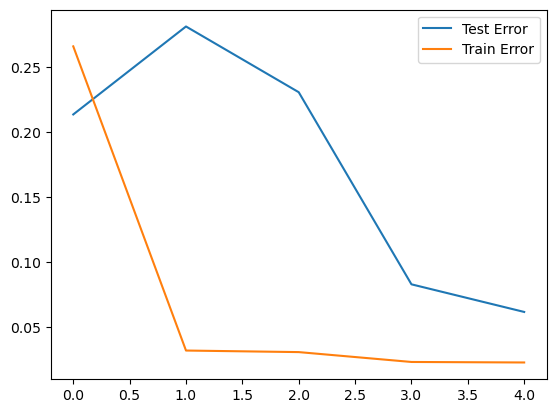

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline


np.random.seed(2018)
n = 50
maxdegree = 5
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
TestError = np.zeros(maxdegree)
TrainError = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    clf = model.fit(x_train_scaled,y_train)
    y_fit = clf.predict(x_train_scaled)
    y_pred = clf.predict(x_test_scaled) 
    polydegree[degree] = degree
    TestError[degree] = np.mean( np.mean((y_test - y_pred)**2) )
    TrainError[degree] = np.mean( np.mean((y_train - y_fit)**2) )

plt.plot(polydegree, TestError, label='Test Error')
plt.plot(polydegree, TrainError, label='Train Error')
plt.legend()
plt.show()

## More preprocessing examples, two-dimensional example, the Franke function

In [14]:
# Common imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')


def FrankeFunction(x,y):
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4


def create_X(x, y, n ):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X


# Making meshgrid of datapoints and compute Franke's function
n = 5
N = 1000
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
z = FrankeFunction(x, y)
X = create_X(x, y, n=n)    
# split in training and test data
X_train, X_test, y_train, y_test = train_test_split(X,z,test_size=0.2)


clf = skl.LinearRegression().fit(X_train, y_train)

# The mean squared error and R2 score
print("MSE before scaling: {:.2f}".format(mean_squared_error(clf.predict(X_test), y_test)))
print("R2 score before scaling {:.2f}".format(clf.score(X_test,y_test)))

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature min values before scaling:\n {}".format(X_train.min(axis=0)))
print("Feature max values before scaling:\n {}".format(X_train.max(axis=0)))

print("Feature min values after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("Feature max values after scaling:\n {}".format(X_train_scaled.max(axis=0)))

clf = skl.LinearRegression().fit(X_train_scaled, y_train)


print("MSE after  scaling: {:.2f}".format(mean_squared_error(clf.predict(X_test_scaled), y_test)))
print("R2 score for  scaled data: {:.2f}".format(clf.score(X_test_scaled,y_test)))

MSE before scaling: 0.00
R2 score before scaling 1.00
Feature min values before scaling:
 [1.00000000e+00 6.97906022e-03 2.43639284e-03 4.87072815e-05
 1.70037324e-05 5.93601008e-06 3.39931051e-07 1.18670072e-07
 4.14277718e-08 1.44624525e-08 2.37239927e-09 8.28205578e-10
 2.89126914e-10 1.00934327e-10 3.52362157e-11 1.65571174e-11
 5.78009660e-12 2.01783414e-12 7.04426744e-13 2.45915671e-13
 8.58492636e-14]
Feature max values before scaling:
 [1.         0.99970894 0.99978365 0.99941797 0.99949266 0.99956735
 0.99912709 0.99920175 0.99927642 0.9993511  0.99883628 0.99891093
 0.99898558 0.99906023 0.99913489 0.99854557 0.99862019 0.99869482
 0.99876945 0.99884409 0.99891873]
Feature min values after scaling:
 [ 0.         -1.71761101 -1.75770568 -1.12330033 -1.12591227 -1.12871842
 -0.88613493 -0.884669   -0.88323026 -0.88182591 -0.75269037 -0.75050135
 -0.74829661 -0.74607851 -0.74384949 -0.6652177  -0.66294408 -0.66064822
 -0.65833132 -0.65599456 -0.6536392 ]
Feature max values after

## To think about, first part

When you are comparing your own code with for example **Scikit-Learn**'s
library, there are some technicalities to keep in mind.  The examples
here demonstrate some of these aspects with potential pitfalls.

The discussion here focuses on the role of the intercept, how we can
set up the design matrix, what scaling we should use and other topics
which tend  confuse us.

The intercept can be interpreted as the expected value of our
target/output variables when all other predictors are set to zero.
Thus, if we cannot assume that the expected outputs/targets are zero
when all predictors are zero (the columns in the design matrix), it
may be a bad idea to implement a model which penalizes the intercept.
Furthermore, in for example Ridge and Lasso regression (to be discussed in moe detail next week), the default solutions
from the library **Scikit-Learn** (when not shrinking $\beta_0$) for the unknown parameters
$\boldsymbol{\beta}$, are derived under the assumption that both $\boldsymbol{y}$ and
$\boldsymbol{X}$ are zero centered, that is we subtract the mean values.

## More thinking

If our predictors represent different scales, then it is important to
standardize the design matrix $\boldsymbol{X}$ by subtracting the mean of each
column from the corresponding column and dividing the column with its
standard deviation. Most machine learning libraries do this as a default. This means that if you compare your code with the results from a given library,
the results may differ. 

The
[Standadscaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
function in **Scikit-Learn** does this for us.  For the data sets we
have been studying in our various examples, the data are in many cases
already scaled and there is no need to scale them. You as a user of different machine learning algorithms, should always perform  a
survey of your data, with a critical assessment of them in case you need to scale the data.

If you need to scale the data, not doing so will give an *unfair*
penalization of the parameters since their magnitude depends on the
scale of their corresponding predictor.

Suppose as an example that you 
you have an input variable given by the heights of different persons.
Human height might be measured in inches or meters or
kilometers. If measured in kilometers, a standard linear regression
model with this predictor would probably give a much bigger
coefficient term, than if measured in millimeters.
This can clearly lead to problems in evaluating the cost/loss functions.

## Still thinking

Keep in mind that when you transform your data set before training a model, the same transformation needs to be done
on your eventual new data set  before making a prediction. If we translate this into a Python code, it would could be implemented as follows
(note that the lines are commented since the model function has not been defined)

In [13]:
#Model training, we compute the mean value of y and X
y_train_mean = np.mean(y_train)
X_train_mean = np.mean(X_train,axis=0)
X_train = X_train - X_train_mean
y_train = y_train - y_train_mean

# The we fit our model with the training data
#trained_model = some_model.fit(X_train,y_train)


#Model prediction, we need also to transform our data set used for the prediction.
X_test = X_test - X_train_mean #Use mean from training data
#y_pred = trained_model(X_test)
y_pred = y_pred + y_train_mean

## What does centering (subtracting the mean values) mean mathematically?

Let us try to understand what this may imply mathematically when we
subtract the mean values, also known as *zero centering*. For
simplicity, we will focus on  ordinary regression, as done in the above example.

The cost/loss function  for regression is

$$
C(\beta_0, \beta_1, ... , \beta_{p-1}) = \frac{1}{n}\sum_{i=0}^{n} \left(y_i - \beta_0 - \sum_{j=1}^{p-1} X_{ij}\beta_j\right)^2,.
$$

Recall also that we use the squared value since this leads to an increase of the penalty for higher differences between predicted and output/target values.

What we have done is to single out the $\beta_0$ term in the definition of the mean squared error (MSE).
The design matrix
$X$ does in this case not contain any intercept column.
When we take the derivative with respect to $\beta_0$, we want the derivative to obey

$$
\frac{\partial C}{\partial \beta_j} = 0,
$$

for all $j$. For $\beta_0$ we have

$$
\frac{\partial C}{\partial \beta_0} = -\frac{2}{n}\sum_{i=0}^{n-1} \left(y_i - \beta_0 - \sum_{j=1}^{p-1} X_{ij} \beta_j\right).
$$

Multiplying away the constant $2/n$, we obtain

$$
\sum_{i=0}^{n-1} \beta_0 = \sum_{i=0}^{n-1}y_i - \sum_{i=0}^{n-1} \sum_{j=1}^{p-1} X_{ij} \beta_j.
$$

## Further Manipulations

Let us special first to the case where we have only two parameters $\beta_0$ and $\beta_1$.
Our result for $\beta_0$ simplifies then to

$$
n\beta_0 = \sum_{i=0}^{n-1}y_i - \sum_{i=0}^{n-1} X_{i1} \beta_1.
$$

We obtain then

$$
\beta_0 = \frac{1}{n}\sum_{i=0}^{n-1}y_i - \beta_1\frac{1}{n}\sum_{i=0}^{n-1} X_{i1}.
$$

If we define

$$
\mu_1=\frac{1}{n}\sum_{i=0}^{n-1} (X_{i1},
$$

and if we define the mean value of the outputs as

$$
\mu_y=\frac{1}{n}\sum_{i=0}^{n-1}y_i,
$$

we have

$$
\beta_0 = \mu_y - \beta_1\mu_{1}.
$$

In the general case, that is we have more parameters than $\beta_0$ and $\beta_1$, we have

$$
\beta_0 = \frac{1}{n}\sum_{i=0}^{n-1}y_i - \frac{1}{n}\sum_{i=0}^{n-1}\sum_{j=1}^{p-1} X_{ij}\beta_j.
$$

Replacing $y_i$ with $y_i - y_i - \overline{\boldsymbol{y}}$ and centering also our design matrix results in a cost function (in vector-matrix disguise)

$$
C(\boldsymbol{\beta}) = (\boldsymbol{\tilde{y}} - \tilde{X}\boldsymbol{\beta})^T(\boldsymbol{\tilde{y}} - \tilde{X}\boldsymbol{\beta}).
$$

## Wrapping it up

If we minimize with respect to $\boldsymbol{\beta}$ we have then

$$
\hat{\boldsymbol{\beta}} = (\tilde{X}^T\tilde{X})^{-1}\tilde{X}^T\boldsymbol{\tilde{y}},
$$

where $\boldsymbol{\tilde{y}} = \boldsymbol{y} - \overline{\boldsymbol{y}}$
and $\tilde{X}_{ij} = X_{ij} - \frac{1}{n}\sum_{k=0}^{n-1}X_{kj}$.

For Ridge regression we need to add $\lambda \boldsymbol{\beta}^T\boldsymbol{\beta}$ to the cost function and get then

$$
\hat{\boldsymbol{\beta}} = (\tilde{X}^T\tilde{X} + \lambda I)^{-1}\tilde{X}^T\boldsymbol{\tilde{y}}.
$$

What does this mean? And why do we insist on all this? Let us look at some examples.

## Linear Regression code, Intercept handling first

This code shows a simple first-order fit to a data set using the above transformed data, where we consider the role of the intercept first, by either excluding it or including it (*code example thanks to  Øyvind Sigmundson Schøyen*). Here our scaling of the data is done by subtracting the mean values only.
Note also that we do not split the data into training and test.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


np.random.seed(2021)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


def fit_beta(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y


true_beta = [2, 0.5, 3.7]

x = np.linspace(0, 1, 11)
y = np.sum(
    np.asarray([x ** p * b for p, b in enumerate(true_beta)]), axis=0
) + 0.1 * np.random.normal(size=len(x))

degree = 3
X = np.zeros((len(x), degree))

# Include the intercept in the design matrix
for p in range(degree):
    X[:, p] = x ** p

beta = fit_beta(X, y)

# Intercept is included in the design matrix
skl = LinearRegression(fit_intercept=False).fit(X, y)

print(f"True beta: {true_beta}")
print(f"Fitted beta: {beta}")
print(f"Sklearn fitted beta: {skl.coef_}")
ypredictOwn = X @ beta
ypredictSKL = skl.predict(X)
print(f"MSE with intercept column")
print(MSE(y,ypredictOwn))
print(f"MSE with intercept column from SKL")
print(MSE(y,ypredictSKL))


plt.figure()
plt.scatter(x, y, label="Data")
plt.plot(x, X @ beta, label="Fit")
plt.plot(x, skl.predict(X), label="Sklearn (fit_intercept=False)")


# Do not include the intercept in the design matrix
X = np.zeros((len(x), degree - 1))

for p in range(degree - 1):
    X[:, p] = x ** (p + 1)

# Intercept is not included in the design matrix
skl = LinearRegression(fit_intercept=True).fit(X, y)

# Use centered values for X and y when computing coefficients
y_offset = np.average(y, axis=0)
X_offset = np.average(X, axis=0)

beta = fit_beta(X - X_offset, y - y_offset)
intercept = np.mean(y_offset - X_offset @ beta)

print(f"Manual intercept: {intercept}")
print(f"Fitted beta (wiothout intercept): {beta}")
print(f"Sklearn intercept: {skl.intercept_}")
print(f"Sklearn fitted beta (without intercept): {skl.coef_}")
ypredictOwn = X @ beta
ypredictSKL = skl.predict(X)
print(f"MSE with Manual intercept")
print(MSE(y,ypredictOwn+intercept))
print(f"MSE with Sklearn intercept")
print(MSE(y,ypredictSKL))

plt.plot(x, X @ beta + intercept, "--", label="Fit (manual intercept)")
plt.plot(x, skl.predict(X), "--", label="Sklearn (fit_intercept=True)")
plt.grid()
plt.legend()

plt.show()

The intercept is the value of our output/target variable
when all our features are zero and our function crosses the $y$-axis (for a one-dimensional case). 

Printing the MSE, we see first that both methods give the same MSE, as
they should.  However, when we move to for example Ridge regression (discussed next week),
the way we treat the intercept may give a larger or smaller MSE,
meaning that the MSE can be penalized by the value of the
intercept. Not including the intercept in the fit, means that the
regularization term does not include $\beta_0$. For different values
of $\lambda$, this may lead to differing MSE values. 

To remind the reader, the regularization term, with the intercept in Ridge regression is given by

$$
\lambda \vert\vert \boldsymbol{\beta} \vert\vert_2^2 = \lambda \sum_{j=0}^{p-1}\beta_j^2,
$$

but when we take out the intercept, this equation becomes

$$
\lambda \vert\vert \boldsymbol{\beta} \vert\vert_2^2 = \lambda \sum_{j=1}^{p-1}\beta_j^2.
$$

For Lasso regression we have

$$
\lambda \vert\vert \boldsymbol{\beta} \vert\vert_1 = \lambda \sum_{j=1}^{p-1}\vert\beta_j\vert.
$$

It means that, when scaling the design matrix and the outputs/targets,
by subtracting the mean values, we have an optimization problem which
is not penalized by the intercept. The MSE value can then be smaller
since it focuses only on the remaining quantities. If we however bring
back the intercept, we will get an MSE which then contains the
intercept. This becomes more important when we discuss Ridge and Lasso
regression next week.

## Mathematical Interpretation of Ordinary Least Squares

What is presented here is a mathematical analysis of various regression algorithms (ordinary least  squares, Ridge and Lasso Regression). The analysis is based on an important algorithm in linear algebra, the so-called Singular Value Decomposition (SVD). 

We have shown that in ordinary least squares the optimal parameters $\beta$ are given by

$$
\hat{\boldsymbol{\beta}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

The **hat** over $\boldsymbol{\beta}$ means we have the optimal parameters after minimization of the cost function.

This means that our best model is defined as

$$
\tilde{\boldsymbol{y}}=\boldsymbol{X}\hat{\boldsymbol{\beta}} = \boldsymbol{X}\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

We now define a matrix

$$
\boldsymbol{A}=\boldsymbol{X}\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T.
$$

We can rewrite

$$
\tilde{\boldsymbol{y}}=\boldsymbol{X}\hat{\boldsymbol{\beta}} = \boldsymbol{A}\boldsymbol{y}.
$$

The matrix $\boldsymbol{A}$ has the important property that $\boldsymbol{A}^2=\boldsymbol{A}$. This is the definition of a projection matrix.
We can then interpret our optimal model $\tilde{\boldsymbol{y}}$ as being represented  by an orthogonal  projection of $\boldsymbol{y}$ onto a space defined by the column vectors of $\boldsymbol{X}$.  In our case here the matrix $\boldsymbol{A}$ is a square matrix. If it is a general rectangular matrix we have an oblique projection matrix.

## Residual Error

We have defined the residual error as

$$
\boldsymbol{\epsilon}=\boldsymbol{y}-\tilde{\boldsymbol{y}}=\left[\boldsymbol{I}-\boldsymbol{X}\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\right]\boldsymbol{y}.
$$

The residual errors are then the projections of $\boldsymbol{y}$ onto the orthogonal component of the space defined by the column vectors of $\boldsymbol{X}$.

## Simple case

If the matrix $\boldsymbol{X}$ is an orthogonal (or unitary in case of complex values) matrix, we have

$$
\boldsymbol{X}^T\boldsymbol{X}=\boldsymbol{X}\boldsymbol{X}^T = \boldsymbol{I}.
$$

In this case the matrix $\boldsymbol{A}$ becomes

$$
\boldsymbol{A}=\boldsymbol{X}\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T)=\boldsymbol{I},
$$

and we have the obvious case

$$
\boldsymbol{\epsilon}=\boldsymbol{y}-\tilde{\boldsymbol{y}}=0.
$$

This serves also as a useful test of our codes.

## The singular value decomposition

The examples we have looked at so far are cases where we normally can
invert the matrix $\boldsymbol{X}^T\boldsymbol{X}$. Using a polynomial expansion where we fit of various functions leads to
row vectors of the design matrix which are essentially orthogonal due
to the polynomial character of our model. Obtaining the inverse of the
design matrix is then often done via a so-called LU, QR or Cholesky
decomposition.

As we will also see in the first project, 
this may
however not the be case in general and a standard matrix inversion
algorithm based on say LU, QR or Cholesky decomposition may lead to singularities. We will see examples of this below.

There is however a way to circumvent this problem and also
gain some insights about the ordinary least squares approach, and
later shrinkage methods like Ridge and Lasso regressions.

This is given by the **Singular Value Decomposition** (SVD) algorithm,
perhaps the most powerful linear algebra algorithm.  The SVD provides
a numerically stable matrix decomposition that is used in a large
swath oc applications and the decomposition is always stable
numerically.

In machine learning it plays a central role in dealing with for
example design matrices that may be near singular or singular.
Furthermore, as we will see here, the singular values can be related
to the covariance matrix (and thereby the correlation matrix) and in
turn the variance of a given quantity. It plays also an important role
in the principal component analysis where high-dimensional data can be
reduced to the statistically relevant features.

## Linear Regression Problems

One of the typical problems we encounter with linear regression, in particular 
when the matrix $\boldsymbol{X}$ (our so-called design matrix) is high-dimensional, 
are problems with near singular or singular matrices. The column vectors of $\boldsymbol{X}$ 
may be linearly dependent, normally referred to as super-collinearity.  
This means that the matrix may be rank deficient and it is basically impossible to 
to model the data using linear regression. As an example, consider the matrix

$$
\begin{align*}
\mathbf{X} & =  \left[
\begin{array}{rrr}
1 & -1 & 2
\\
1 & 0 & 1
\\
1 & 2  & -1
\\
1 & 1  & 0
\end{array} \right]
\end{align*}
$$

The columns of $\boldsymbol{X}$ are linearly dependent. We see this easily since the 
the first column is the row-wise sum of the other two columns. The rank (more correct,
the column rank) of a matrix is the dimension of the space spanned by the
column vectors. Hence, the rank of $\mathbf{X}$ is equal to the number
of linearly independent columns. In this particular case the matrix has rank 2.

Super-collinearity of an $(n \times p)$-dimensional design matrix $\mathbf{X}$ implies
that the inverse of the matrix $\boldsymbol{X}^T\boldsymbol{X}$ (the matrix we need to invert to solve the linear regression equations) is non-invertible. If we have a square matrix that does not have an inverse, we say this matrix singular. The example here demonstrates this

$$
\begin{align*}
\boldsymbol{X} & =  \left[
\begin{array}{rr}
1 & -1
\\
1 & -1
\end{array} \right].
\end{align*}
$$

We see easily that  $\mbox{det}(\boldsymbol{X}) = x_{11} x_{22} - x_{12} x_{21} = 1 \times (-1) - 1 \times (-1) = 0$. Hence, $\mathbf{X}$ is singular and its inverse is undefined.
This is equivalent to saying that the matrix $\boldsymbol{X}$ has at least an eigenvalue which is zero.

## Fixing the singularity

If our design matrix $\boldsymbol{X}$ which enters the linear regression problem

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\boldsymbol{\beta}  =  (\boldsymbol{X}^{T} \boldsymbol{X})^{-1} \boldsymbol{X}^{T} \boldsymbol{y},
\label{_auto1} \tag{1}
\end{equation}
$$

has linearly dependent column vectors, we will not be able to compute the inverse
of $\boldsymbol{X}^T\boldsymbol{X}$ and we cannot find the parameters (estimators) $\beta_i$. 
The estimators are only well-defined if $(\boldsymbol{X}^{T}\boldsymbol{X})^{-1}$ exits. 
This is more likely to happen when the matrix $\boldsymbol{X}$ is high-dimensional. In this case it is likely to encounter a situation where 
the regression parameters $\beta_i$ cannot be estimated.

A cheap  *ad hoc* approach is  simply to add a small diagonal component to the matrix to invert, that is we change

$$
\boldsymbol{X}^{T} \boldsymbol{X} \rightarrow \boldsymbol{X}^{T} \boldsymbol{X}+\lambda \boldsymbol{I},
$$

where $\boldsymbol{I}$ is the identity matrix.  When we discuss **Ridge** regression this is actually what we end up evaluating. The parameter $\lambda$ is called a hyperparameter. More about this later.

## Basic math of the SVD

From standard linear algebra we know that a square matrix $\boldsymbol{X}$ can be diagonalized if and only it is 
a so-called [normal matrix](https://en.wikipedia.org/wiki/Normal_matrix), that is if $\boldsymbol{X}\in {\mathbb{R}}^{n\times n}$
we have $\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{X}^T\boldsymbol{X}$ or if $\boldsymbol{X}\in {\mathbb{C}}^{n\times n}$ we have $\boldsymbol{X}\boldsymbol{X}^{\dagger}=\boldsymbol{X}^{\dagger}\boldsymbol{X}$.
The matrix has then a set of eigenpairs

$$
(\lambda_1,\boldsymbol{u}_1),\dots, (\lambda_n,\boldsymbol{u}_n),
$$

and the eigenvalues are given by the diagonal matrix

$$
\boldsymbol{\Sigma}=\mathrm{Diag}(\lambda_1, \dots,\lambda_n).
$$

The matrix $\boldsymbol{X}$ can be written in terms of an orthogonal/unitary transformation $\boldsymbol{U}$

$$
\boldsymbol{X} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

with $\boldsymbol{U}\boldsymbol{U}^T=\boldsymbol{I}$ or $\boldsymbol{U}\boldsymbol{U}^{\dagger}=\boldsymbol{I}$.

Not all square matrices are diagonalizable. A matrix like the one discussed above

$$
\boldsymbol{X} = \begin{bmatrix} 
1&  -1 \\
1& -1\\
\end{bmatrix}
$$

is not diagonalizable, it is a so-called [defective matrix](https://en.wikipedia.org/wiki/Defective_matrix). It is easy to see that the condition
$\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{X}^T\boldsymbol{X}$ is not fulfilled.

## The SVD, a Fantastic Algorithm

However, and this is the strength of the SVD algorithm, any general
matrix $\boldsymbol{X}$ can be decomposed in terms of a diagonal matrix and
two orthogonal/unitary matrices.  The [Singular Value Decompostion
(SVD) theorem](https://en.wikipedia.org/wiki/Singular_value_decomposition)
states that a general $m\times n$ matrix $\boldsymbol{X}$ can be written in
terms of a diagonal matrix $\boldsymbol{\Sigma}$ of dimensionality $m\times n$
and two orthognal matrices $\boldsymbol{U}$ and $\boldsymbol{V}$, where the first has
dimensionality $m \times m$ and the last dimensionality $n\times n$.
We have then

$$
\boldsymbol{X} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
$$

As an example, the above defective matrix can be decomposed as

$$
\boldsymbol{X} = \frac{1}{\sqrt{2}}\begin{bmatrix}  1&  1 \\ 1& -1\\ \end{bmatrix} \begin{bmatrix}  2&  0 \\ 0& 0\\ \end{bmatrix}    \frac{1}{\sqrt{2}}\begin{bmatrix}  1&  -1 \\ 1& 1\\ \end{bmatrix}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

with eigenvalues $\sigma_1=2$ and $\sigma_2=0$. 
The SVD exits always! 

The SVD
decomposition (singular values) gives eigenvalues 
$\sigma_i\geq\sigma_{i+1}$ for all $i$ and for dimensions larger than $i=p$, the
eigenvalues (singular values) are zero.

In the general case, where our design matrix $\boldsymbol{X}$ has dimension
$n\times p$, the matrix is thus decomposed into an $n\times n$
orthogonal matrix $\boldsymbol{U}$, a $p\times p$ orthogonal matrix $\boldsymbol{V}$
and a diagonal matrix $\boldsymbol{\Sigma}$ with $r=\mathrm{min}(n,p)$
singular values $\sigma_i\geq 0$ on the main diagonal and zeros filling
the rest of the matrix.  There are at most $p$ singular values
assuming that $n > p$. In our regression examples for the nuclear
masses and the equation of state this is indeed the case, while for
the Ising model we have $p > n$. These are often cases that lead to
near singular or singular matrices.

The columns of $\boldsymbol{U}$ are called the left singular vectors while the columns of $\boldsymbol{V}$ are the right singular vectors.

## Economy-size SVD

If we assume that $n > p$, then our matrix $\boldsymbol{U}$ has dimension $n
\times n$. The last $n-p$ columns of $\boldsymbol{U}$ become however
irrelevant in our calculations since they are multiplied with the
zeros in $\boldsymbol{\Sigma}$.

The economy-size decomposition removes extra rows or columns of zeros
from the diagonal matrix of singular values, $\boldsymbol{\Sigma}$, along with the columns
in either $\boldsymbol{U}$ or $\boldsymbol{V}$ that multiply those zeros in the expression. 
Removing these zeros and columns can improve execution time
and reduce storage requirements without compromising the accuracy of
the decomposition.

If $n > p$, we keep only the first $p$ columns of $\boldsymbol{U}$ and $\boldsymbol{\Sigma}$ has dimension $p\times p$. 
If $p > n$, then only the first $n$ columns of $\boldsymbol{V}$ are computed and $\boldsymbol{\Sigma}$ has dimension $n\times n$.
The $n=p$ case is obvious, we retain the full SVD. 
In general the economy-size SVD leads to less FLOPS and still conserving the desired accuracy.

## Codes for the SVD

In [15]:
import numpy as np
# SVD inversion
def SVD(A):
    ''' Takes as input a numpy matrix A and returns inv(A) based on singular value decomposition (SVD).
    SVD is numerically more stable than the inversion algorithms provided by
    numpy and scipy.linalg at the cost of being slower.
    '''
    U, S, VT = np.linalg.svd(A,full_matrices=True)
    print('test U')
    print( (np.transpose(U) @ U - U @np.transpose(U)))
    print('test VT')
    print( (np.transpose(VT) @ VT - VT @np.transpose(VT)))
    print(U)
    print(S)
    print(VT)

    D = np.zeros((len(U),len(VT)))
    for i in range(0,len(VT)):
        D[i,i]=S[i]
    return U @ D @ VT


X = np.array([ [1.0,-1.0], [1.0,-1.0]])
#X = np.array([[1, 2], [3, 4], [5, 6]])

print(X)
C = SVD(X)
# Print the difference between the original matrix and the SVD one
print(C-X)

The matrix $\boldsymbol{X}$ has columns that are linearly dependent. The first
column is the row-wise sum of the other two columns. The rank of a
matrix (the column rank) is the dimension of space spanned by the
column vectors. The rank of the matrix is the number of linearly
independent columns, in this case just $2$. We see this from the
singular values when running the above code. Running the standard
inversion algorithm for matrix inversion with $\boldsymbol{X}^T\boldsymbol{X}$ results
in the program terminating due to a singular matrix.

## Note about SVD Calculations

The $U$, $S$, and $V$ matrices returned from the **svd()** function
cannot be multiplied directly.

As you can see from the code, the $S$ vector must be converted into a
diagonal matrix. This may cause a problem as the size of the matrices
do not fit the rules of matrix multiplication, where the number of
columns in a matrix must match the number of rows in the subsequent
matrix.

If you wish to include the zero singular values, you will need to
resize the matrices and set up a diagonal matrix as done in the above
example

## Mathematics of the SVD and implications

Let us take a closer look at the mathematics of the SVD and the various implications for machine learning studies.

Our starting point is our design matrix $\boldsymbol{X}$ of dimension $n\times p$

$$
\boldsymbol{X}=\begin{bmatrix}
x_{0,0} & x_{0,1} & x_{0,2}& \dots & \dots x_{0,p-1}\\
x_{1,0} & x_{1,1} & x_{1,2}& \dots & \dots x_{1,p-1}\\
x_{2,0} & x_{2,1} & x_{2,2}& \dots & \dots x_{2,p-1}\\
\dots & \dots & \dots & \dots \dots & \dots \\
x_{n-2,0} & x_{n-2,1} & x_{n-2,2}& \dots & \dots x_{n-2,p-1}\\
x_{n-1,0} & x_{n-1,1} & x_{n-1,2}& \dots & \dots x_{n-1,p-1}\\
\end{bmatrix}.
$$

We can SVD decompose our matrix as

$$
\boldsymbol{X}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

where $\boldsymbol{U}$ is an orthogonal matrix of dimension $n\times n$, meaning that $\boldsymbol{U}\boldsymbol{U}^T=\boldsymbol{U}^T\boldsymbol{U}=\boldsymbol{I}_n$. Here $\boldsymbol{I}_n$ is the unit matrix of dimension $n \times n$.

Similarly, $\boldsymbol{V}$ is an orthogonal matrix of dimension $p\times p$, meaning that $\boldsymbol{V}\boldsymbol{V}^T=\boldsymbol{V}^T\boldsymbol{V}=\boldsymbol{I}_p$. Here $\boldsymbol{I}_n$ is the unit matrix of dimension $p \times p$.

Finally $\boldsymbol{\Sigma}$ contains the singular values $\sigma_i$. This matrix has dimension $n\times p$ and the singular values $\sigma_i$ are all positive. The non-zero values are ordered in descending order, that is

$$
\sigma_0 > \sigma_1 > \sigma_2 > \dots > \sigma_{p-1} > 0.
$$

All values beyond $p-1$ are all zero.

## Example Matrix

As an example, consider the following $3\times 2$ example for the matrix $\boldsymbol{\Sigma}$

$$
\boldsymbol{\Sigma}=
\begin{bmatrix}
2& 0 \\
0 & 1 \\
0 & 0 \\
\end{bmatrix}
$$

The singular values are $\sigma_0=2$ and $\sigma_1=1$. It is common to rewrite the matrix $\boldsymbol{\Sigma}$ as

$$
\boldsymbol{\Sigma}=
\begin{bmatrix}
\boldsymbol{\tilde{\Sigma}}\\
\boldsymbol{0}\\
\end{bmatrix},
$$

where

$$
\boldsymbol{\tilde{\Sigma}}=
\begin{bmatrix}
2& 0 \\
0 & 1 \\
\end{bmatrix},
$$

contains only the singular values.   Note also (and we will use this below) that

$$
\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}=
\begin{bmatrix}
4& 0 \\
0 & 1 \\
\end{bmatrix},
$$

which is a $2\times 2 $ matrix while

$$
\boldsymbol{\Sigma}\boldsymbol{\Sigma}^T=
\begin{bmatrix}
4& 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0\\
\end{bmatrix},
$$

is a $3\times 3 $ matrix. The last row and column of this last matrix
contain only zeros. This will have important consequences for our SVD
decomposition of the design matrix.

## Setting up the Matrix to be inverted

The matrix that may cause problems for us is $\boldsymbol{X}^T\boldsymbol{X}$. Using the SVD we can rewrite this matrix as

$$
\boldsymbol{X}^T\boldsymbol{X}=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T,
$$

and using the orthogonality of the matrix $\boldsymbol{U}$ we have

$$
\boldsymbol{X}^T\boldsymbol{X}=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T.
$$

We define $\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}=\tilde{\boldsymbol{\Sigma}}^2$ which is  a diagonal matrix containing only the singular values squared. It has dimensionality $p \times p$.

We can now insert the result for the matrix $\boldsymbol{X}^T\boldsymbol{X}$ into our equation for ordinary least squares where

$$
\tilde{y}_{\mathrm{OLS}}=\boldsymbol{X}\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

and using our SVD decomposition of $\boldsymbol{X}$ we have

$$
\tilde{y}_{\mathrm{OLS}}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T\left(\boldsymbol{V}\tilde{\boldsymbol{\Sigma}}^{2}(\boldsymbol{V}^T\right)^{-1}\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T\boldsymbol{y},
$$

which gives us, using the orthogonality of the matrix $\boldsymbol{V}$,

$$
\tilde{y}_{\mathrm{OLS}}=\boldsymbol{U}\boldsymbol{U}^T\boldsymbol{y}=\sum_{i=0}^{p-1}\boldsymbol{u}_i\boldsymbol{u}^T_i\boldsymbol{y},
$$

It means that the ordinary least square model (with the optimal
parameters) $\boldsymbol{\tilde{y}}$, corresponds to an orthogonal
transformation of the output (or target) vector $\boldsymbol{y}$ by the
vectors of the matrix $\boldsymbol{U}$. **Note that the summation ends at**
$p-1$, that is $\boldsymbol{\tilde{y}}\ne \boldsymbol{y}$. We can thus not use the
orthogonality relation for the matrix $\boldsymbol{U}$. This can already be
when we multiply the matrices $\boldsymbol{\Sigma}^T\boldsymbol{U}^T$.

## Further properties (important for our analyses later)

Let us study again $\boldsymbol{X}^T\boldsymbol{X}$ in terms of our SVD,

$$
\boldsymbol{X}^T\boldsymbol{X}=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T.
$$

If we now multiply from the right with $\boldsymbol{V}$ (using the orthogonality of $\boldsymbol{V}$) we get

$$
\left(\boldsymbol{X}^T\boldsymbol{X}\right)\boldsymbol{V}=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}.
$$

This means the vectors $\boldsymbol{v}_i$ of the orthogonal matrix $\boldsymbol{V}$ are the eigenvectors of the matrix $\boldsymbol{X}^T\boldsymbol{X}$
with eigenvalues given by the singular values squared, that is

$$
\left(\boldsymbol{X}^T\boldsymbol{X}\right)\boldsymbol{v}_i=\boldsymbol{v}_i\sigma_i^2.
$$

Similarly, if we use the SVD decomposition for the matrix $\boldsymbol{X}\boldsymbol{X}^T$, we have

$$
\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{\Sigma}^T\boldsymbol{U}^T.
$$

If we now multiply from the right with $\boldsymbol{U}$ (using the orthogonality of $\boldsymbol{U}$) we get

$$
\left(\boldsymbol{X}\boldsymbol{X}^T\right)\boldsymbol{U}=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{\Sigma}^T.
$$

This means the vectors $\boldsymbol{u}_i$ of the orthogonal matrix $\boldsymbol{U}$ are the eigenvectors of the matrix $\boldsymbol{X}\boldsymbol{X}^T$
with eigenvalues given by the singular values squared, that is

$$
\left(\boldsymbol{X}\boldsymbol{X}^T\right)\boldsymbol{u}_i=\boldsymbol{u}_i\sigma_i^2.
$$

**Important note**: we have defined our design matrix $\boldsymbol{X}$ to be an
$n\times p$ matrix. In most supervised learning cases we have that $n
\ge p$, and quite often we have $n >> p$. For linear algebra based methods like ordinary least squares or Ridge regression, this leads to a matrix $\boldsymbol{X}^T\boldsymbol{X}$ which is small and thereby easier to handle from a computational point of view (in terms of number of floating point operations).

In our lectures, the number of columns will
always refer to the number of features in our data set, while the
number of rows represents the number of data inputs. Note that in
other texts you may find the opposite notation. This has consequences
for the definition of for example the covariance matrix and its relation to the SVD.

## Meet the Covariance Matrix

Before we move on to a discussion of Ridge and Lasso regression, we want to show an important example of the above.

We have already noted that the matrix $\boldsymbol{X}^T\boldsymbol{X}$ in ordinary
least squares is proportional to the second derivative of the cost
function, that is we have

$$
\frac{\partial^2 C(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}\partial \boldsymbol{\beta}^T} =\frac{2}{n}\boldsymbol{X}^T\boldsymbol{X}.
$$

This quantity defines was what is called the Hessian matrix (the second derivative of a function we want to optimize).

The Hessian matrix plays an important role and is defined in this course as

$$
\boldsymbol{H}=\boldsymbol{X}^T\boldsymbol{X}.
$$

The Hessian matrix for ordinary least squares is also proportional to
the covariance matrix. This means also that we can use the SVD to find
the eigenvalues of the covariance matrix and the Hessian matrix in
terms of the singular values.   Let us develop these arguments, as they will play an important role in our machine learning studies.

## Introducing the Covariance and Correlation functions

Before we discuss the link between for example Ridge regression and the singular value decomposition, we need to remind ourselves about
the definition of the covariance and the correlation function. These are quantities that play a central role in machine learning methods.

Suppose we have defined two vectors
$\hat{x}$ and $\hat{y}$ with $n$ elements each. The covariance matrix $\boldsymbol{C}$ is defined as

$$
\boldsymbol{C}[\boldsymbol{x},\boldsymbol{y}] = \begin{bmatrix} \mathrm{cov}[\boldsymbol{x},\boldsymbol{x}] & \mathrm{cov}[\boldsymbol{x},\boldsymbol{y}] \\
                              \mathrm{cov}[\boldsymbol{y},\boldsymbol{x}] & \mathrm{cov}[\boldsymbol{y},\boldsymbol{y}] \\
             \end{bmatrix},
$$

where for example

$$
\mathrm{cov}[\boldsymbol{x},\boldsymbol{y}] =\frac{1}{n} \sum_{i=0}^{n-1}(x_i- \overline{x})(y_i- \overline{y}).
$$

With this definition and recalling that the variance is defined as

$$
\mathrm{var}[\boldsymbol{x}]=\frac{1}{n} \sum_{i=0}^{n-1}(x_i- \overline{x})^2,
$$

we can rewrite the covariance matrix as

$$
\boldsymbol{C}[\boldsymbol{x},\boldsymbol{y}] = \begin{bmatrix} \mathrm{var}[\boldsymbol{x}] & \mathrm{cov}[\boldsymbol{x},\boldsymbol{y}] \\
                              \mathrm{cov}[\boldsymbol{x},\boldsymbol{y}] & \mathrm{var}[\boldsymbol{y}] \\
             \end{bmatrix}.
$$

**Note:** we have used $1/n$ in the above definitions of the *sample* variance and covariance. We assume then that we can calculate the exact mean value. 
What you will find in essentially all statistics texts are equations
with a factor $1/(n-1)$. This is called [Bessel's correction](https://mathworld.wolfram.com/BesselsCorrection.html). This
method corrects the bias in the estimation of the population variance
and covariance. It also partially corrects the bias in the estimation
of the population standard deviation. If you use a library like
**Scikit-Learn** or **nunmpy's** function to calculate the covariance, this
quantity will be computed with a factor $1/(n-1)$.

## Covariance and Correlation Matrix

The covariance takes values between zero and infinity and may thus
lead to problems with loss of numerical precision for particularly
large values. It is common to scale the covariance matrix by
introducing instead the correlation matrix defined via the so-called
correlation function

$$
\mathrm{corr}[\boldsymbol{x},\boldsymbol{y}]=\frac{\mathrm{cov}[\boldsymbol{x},\boldsymbol{y}]}{\sqrt{\mathrm{var}[\boldsymbol{x}] \mathrm{var}[\boldsymbol{y}]}}.
$$

The correlation function is then given by values $\mathrm{corr}[\boldsymbol{x},\boldsymbol{y}]
\in [-1,1]$. This avoids eventual problems with too large values. We
can then define the correlation matrix for the two vectors $\boldsymbol{x}$
and $\boldsymbol{y}$ as

$$
\boldsymbol{K}[\boldsymbol{x},\boldsymbol{y}] = \begin{bmatrix} 1 & \mathrm{corr}[\boldsymbol{x},\boldsymbol{y}] \\
                              \mathrm{corr}[\boldsymbol{y},\boldsymbol{x}] & 1 \\
             \end{bmatrix},
$$

In the above example this is the function we constructed using **pandas**.

## Correlation Function and Design/Feature Matrix

In our derivation of the various regression algorithms like **Ordinary Least Squares** or **Ridge regression**
we defined the design/feature matrix $\boldsymbol{X}$ as

$$
\boldsymbol{X}=\begin{bmatrix}
x_{0,0} & x_{0,1} & x_{0,2}& \dots & \dots x_{0,p-1}\\
x_{1,0} & x_{1,1} & x_{1,2}& \dots & \dots x_{1,p-1}\\
x_{2,0} & x_{2,1} & x_{2,2}& \dots & \dots x_{2,p-1}\\
\dots & \dots & \dots & \dots \dots & \dots \\
x_{n-2,0} & x_{n-2,1} & x_{n-2,2}& \dots & \dots x_{n-2,p-1}\\
x_{n-1,0} & x_{n-1,1} & x_{n-1,2}& \dots & \dots x_{n-1,p-1}\\
\end{bmatrix},
$$

with $\boldsymbol{X}\in {\mathbb{R}}^{n\times p}$, with the predictors/features $p$  refering to the column numbers and the
entries $n$ being the row elements.
We can rewrite the design/feature matrix in terms of its column vectors as

$$
\boldsymbol{X}=\begin{bmatrix} \boldsymbol{x}_0 & \boldsymbol{x}_1 & \boldsymbol{x}_2 & \dots & \dots & \boldsymbol{x}_{p-1}\end{bmatrix},
$$

with a given vector

$$
\boldsymbol{x}_i^T = \begin{bmatrix}x_{0,i} & x_{1,i} & x_{2,i}& \dots & \dots x_{n-1,i}\end{bmatrix}.
$$

With these definitions, we can now rewrite our $2\times 2$
correlation/covariance matrix in terms of a moe general design/feature
matrix $\boldsymbol{X}\in {\mathbb{R}}^{n\times p}$. This leads to a $p\times p$
covariance matrix for the vectors $\boldsymbol{x}_i$ with $i=0,1,\dots,p-1$

$$
\boldsymbol{C}[\boldsymbol{x}] = \begin{bmatrix}
\mathrm{var}[\boldsymbol{x}_0] & \mathrm{cov}[\boldsymbol{x}_0,\boldsymbol{x}_1]  & \mathrm{cov}[\boldsymbol{x}_0,\boldsymbol{x}_2] & \dots & \dots & \mathrm{cov}[\boldsymbol{x}_0,\boldsymbol{x}_{p-1}]\\
\mathrm{cov}[\boldsymbol{x}_1,\boldsymbol{x}_0] & \mathrm{var}[\boldsymbol{x}_1]  & \mathrm{cov}[\boldsymbol{x}_1,\boldsymbol{x}_2] & \dots & \dots & \mathrm{cov}[\boldsymbol{x}_1,\boldsymbol{x}_{p-1}]\\
\mathrm{cov}[\boldsymbol{x}_2,\boldsymbol{x}_0]   & \mathrm{cov}[\boldsymbol{x}_2,\boldsymbol{x}_1] & \mathrm{var}[\boldsymbol{x}_2] & \dots & \dots & \mathrm{cov}[\boldsymbol{x}_2,\boldsymbol{x}_{p-1}]\\
\dots & \dots & \dots & \dots & \dots & \dots \\
\dots & \dots & \dots & \dots & \dots & \dots \\
\mathrm{cov}[\boldsymbol{x}_{p-1},\boldsymbol{x}_0]   & \mathrm{cov}[\boldsymbol{x}_{p-1},\boldsymbol{x}_1] & \mathrm{cov}[\boldsymbol{x}_{p-1},\boldsymbol{x}_{2}]  & \dots & \dots  & \mathrm{var}[\boldsymbol{x}_{p-1}]\\
\end{bmatrix},
$$

and the correlation matrix

$$
\boldsymbol{K}[\boldsymbol{x}] = \begin{bmatrix}
1 & \mathrm{corr}[\boldsymbol{x}_0,\boldsymbol{x}_1]  & \mathrm{corr}[\boldsymbol{x}_0,\boldsymbol{x}_2] & \dots & \dots & \mathrm{corr}[\boldsymbol{x}_0,\boldsymbol{x}_{p-1}]\\
\mathrm{corr}[\boldsymbol{x}_1,\boldsymbol{x}_0] & 1  & \mathrm{corr}[\boldsymbol{x}_1,\boldsymbol{x}_2] & \dots & \dots & \mathrm{corr}[\boldsymbol{x}_1,\boldsymbol{x}_{p-1}]\\
\mathrm{corr}[\boldsymbol{x}_2,\boldsymbol{x}_0]   & \mathrm{corr}[\boldsymbol{x}_2,\boldsymbol{x}_1] & 1 & \dots & \dots & \mathrm{corr}[\boldsymbol{x}_2,\boldsymbol{x}_{p-1}]\\
\dots & \dots & \dots & \dots & \dots & \dots \\
\dots & \dots & \dots & \dots & \dots & \dots \\
\mathrm{corr}[\boldsymbol{x}_{p-1},\boldsymbol{x}_0]   & \mathrm{corr}[\boldsymbol{x}_{p-1},\boldsymbol{x}_1] & \mathrm{corr}[\boldsymbol{x}_{p-1},\boldsymbol{x}_{2}]  & \dots & \dots  & 1\\
\end{bmatrix},
$$

## Covariance Matrix Examples

The Numpy function **np.cov** calculates the covariance elements using
the factor $1/(n-1)$ instead of $1/n$ since it assumes we do not have
the exact mean values.  The following simple function uses the
**np.vstack** function which takes each vector of dimension $1\times n$
and produces a $2\times n$ matrix $\boldsymbol{W}$

Note that this assumes you have the features as the rows, and the inputs as columns, that is

$$
\boldsymbol{W} = \begin{bmatrix} x_0 & x_1 & x_2 & \dots & x_{n-2} & x_{n-1} \\
                     y_0 & y_1 & y_2 & \dots & y_{n-2} & y_{n-1} \\
             \end{bmatrix},
$$

which in turn is converted into into the $2\times 2$ covariance matrix
$\boldsymbol{C}$ via the Numpy function **np.cov()**. We note that we can also calculate
the mean value of each set of samples $\boldsymbol{x}$ etc using the Numpy
function **np.mean(x)**. We can also extract the eigenvalues of the
covariance matrix through the **np.linalg.eig()** function.

In [16]:
# Importing various packages
import numpy as np
n = 100
x = np.random.normal(size=n)
print(np.mean(x))
y = 4+3*x+np.random.normal(size=n)
print(np.mean(y))
W = np.vstack((x, y))
C = np.cov(W)
print(C)

## Correlation Matrix

The previous example can be converted into the correlation matrix by
simply scaling the matrix elements with the variances.  We should also
subtract the mean values for each column. This leads to the following
code which sets up the correlations matrix for the previous example in
a more brute force way. Here we scale the mean values for each column of the design matrix, calculate the relevant mean values and variances and then finally set up the $2\times 2$ correlation matrix (since we have only two vectors).

In [17]:
import numpy as np
n = 100
# define two vectors                                                                                           
x = np.random.random(size=n)
y = 4+3*x+np.random.normal(size=n)
#scaling the x and y vectors                                                                                   
x = x - np.mean(x)
y = y - np.mean(y)
variance_x = np.sum(x@x)/n
variance_y = np.sum(y@y)/n
print(variance_x)
print(variance_y)
cov_xy = np.sum(x@y)/n
cov_xx = np.sum(x@x)/n
cov_yy = np.sum(y@y)/n
C = np.zeros((2,2))
C[0,0]= cov_xx/variance_x
C[1,1]= cov_yy/variance_y
C[0,1]= cov_xy/np.sqrt(variance_y*variance_x)
C[1,0]= C[0,1]
print(C)

We see that the matrix elements along the diagonal are one as they
should be and that the matrix is symmetric. Furthermore, diagonalizing
this matrix we easily see that it is a positive definite matrix.

The above procedure with **numpy** can be made more compact if we use **pandas**.

## Correlation Matrix with Pandas

We whow here how we can set up the correlation matrix using **pandas**, as done in this simple code

In [18]:
import numpy as np
import pandas as pd
n = 10
x = np.random.normal(size=n)
x = x - np.mean(x)
y = 4+3*x+np.random.normal(size=n)
y = y - np.mean(y)
# Note that we transpose the matrix in order to stay with our ordering n x p
X = (np.vstack((x, y))).T
print(X)
Xpd = pd.DataFrame(X)
print(Xpd)
correlation_matrix = Xpd.corr()
print(correlation_matrix)

We expand this model to the Franke function discussed above.

## Correlation Matrix with Pandas and the Franke function

In [19]:
# Common imports
import numpy as np
import pandas as pd


def FrankeFunction(x,y):
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4


def create_X(x, y, n ):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X


# Making meshgrid of datapoints and compute Franke's function
n = 4
N = 100
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
z = FrankeFunction(x, y)
X = create_X(x, y, n=n)    

Xpd = pd.DataFrame(X)
# subtract the mean values and set up the covariance matrix
Xpd = Xpd - Xpd.mean()
covariance_matrix = Xpd.cov()
print(covariance_matrix)

We note here that the covariance is zero for the first rows and
columns since all matrix elements in the design matrix were set to one
(we are fitting the function in terms of a polynomial of degree $n$).

This means that the variance for these elements will be zero and will
cause problems when we set up the correlation matrix.  We can simply
drop these elements and construct a correlation
matrix without these elements.

## Rewriting the Covariance and/or Correlation Matrix

We can rewrite the covariance matrix in a more compact form in terms of the design/feature matrix $\boldsymbol{X}$ as

$$
\boldsymbol{C}[\boldsymbol{x}] = \frac{1}{n}\boldsymbol{X}^T\boldsymbol{X}= \mathbb{E}[\boldsymbol{X}^T\boldsymbol{X}].
$$

To see this let us simply look at a design matrix $\boldsymbol{X}\in {\mathbb{R}}^{2\times 2}$

$$
\boldsymbol{X}=\begin{bmatrix}
x_{00} & x_{01}\\
x_{10} & x_{11}\\
\end{bmatrix}=\begin{bmatrix}
\boldsymbol{x}_{0} & \boldsymbol{x}_{1}\\
\end{bmatrix}.
$$

If we then compute the expectation value (note the $1/n$ factor instead of $1/(n-1)$)

$$
\mathbb{E}[\boldsymbol{X}^T\boldsymbol{X}] = \frac{1}{n}\boldsymbol{X}^T\boldsymbol{X}=\frac{1}{n}\begin{bmatrix}
x_{00}^2+x_{10}^2 & x_{00}x_{01}+x_{10}x_{11}\\
x_{01}x_{00}+x_{11}x_{10} & x_{01}^2+x_{11}^2\\
\end{bmatrix},
$$

which is just

$$
\boldsymbol{C}[\boldsymbol{x}_0,\boldsymbol{x}_1] = \boldsymbol{C}[\boldsymbol{x}]=\begin{bmatrix} \mathrm{var}[\boldsymbol{x}_0] & \mathrm{cov}[\boldsymbol{x}_0,\boldsymbol{x}_1] \\
                              \mathrm{cov}[\boldsymbol{x}_1,\boldsymbol{x}_0] & \mathrm{var}[\boldsymbol{x}_1] \\
             \end{bmatrix},
$$

where we wrote $$\boldsymbol{C}[\boldsymbol{x}_0,\boldsymbol{x}_1] = \boldsymbol{C}[\boldsymbol{x}]$$ to indicate that this is the covariance of the vectors $\boldsymbol{x}$ of the design/feature matrix $\boldsymbol{X}$.

It is easy to generalize this to a matrix $\boldsymbol{X}\in {\mathbb{R}}^{n\times p}$.

## Linking with the SVD

We saw earlier that

$$
\boldsymbol{X}^T\boldsymbol{X}=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T=\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T.
$$

Since the matrices here have dimension $p\times p$, with $p$ corresponding to the singular values, we defined earlier the matrix

$$
\boldsymbol{\Sigma}^T\boldsymbol{\Sigma} = \begin{bmatrix} \tilde{\boldsymbol{\Sigma}} & \boldsymbol{0}\\ \end{bmatrix}\begin{bmatrix} \tilde{\boldsymbol{\Sigma}} \\ \boldsymbol{0}\\ \end{bmatrix},
$$

where the tilde-matrix $\tilde{\boldsymbol{\Sigma}}$ is a matrix of dimension $p\times p$ containing only the singular values $\sigma_i$, that is

$$
\tilde{\boldsymbol{\Sigma}}=\begin{bmatrix} \sigma_0 & 0 & 0 & \dots & 0 & 0 \\
                                    0 & \sigma_1 & 0 & \dots & 0 & 0 \\
				    0 & 0 & \sigma_2 & \dots & 0 & 0 \\
				    0 & 0 & 0 & \dots & \sigma_{p-2} & 0 \\
				    0 & 0 & 0 & \dots & 0 & \sigma_{p-1} \\
\end{bmatrix},
$$

meaning we can write

$$
\boldsymbol{X}^T\boldsymbol{X}=\boldsymbol{V}\tilde{\boldsymbol{\Sigma}}^2\boldsymbol{V}^T.
$$

Multiplying from the right with $\boldsymbol{V}$ (using the orthogonality of $\boldsymbol{V}$) we get

$$
\left(\boldsymbol{X}^T\boldsymbol{X}\right)\boldsymbol{V}=\boldsymbol{V}\tilde{\boldsymbol{\Sigma}}^2.
$$

## What does it mean?

This means the vectors $\boldsymbol{v}_i$ of the orthogonal matrix $\boldsymbol{V}$
are the eigenvectors of the matrix $\boldsymbol{X}^T\boldsymbol{X}$ with eigenvalues
given by the singular values squared, that is

$$
\left(\boldsymbol{X}^T\boldsymbol{X}\right)\boldsymbol{v}_i=\boldsymbol{v}_i\sigma_i^2.
$$

In other words, each non-zero singular value of $\boldsymbol{X}$ is a positive
square root of an eigenvalue of $\boldsymbol{X}^T\boldsymbol{X}$.  It means also that
the columns of $\boldsymbol{V}$ are the eigenvectors of
$\boldsymbol{X}^T\boldsymbol{X}$. Since we have ordered the singular values of
$\boldsymbol{X}$ in a descending order, it means that the column vectors
$\boldsymbol{v}_i$ are hierarchically ordered by how much correlation they
encode from the columns of $\boldsymbol{X}$. 

Note that these are also the eigenvectors and eigenvalues of the
Hessian matrix. Note also that the Hessian matrix we are discussing here is from a cost function defined by the  mean squared error only.

If we now recall the definition of the covariance matrix (not using
Bessel's correction) we have

$$
\boldsymbol{C}[\boldsymbol{X}]=\frac{1}{n}\boldsymbol{X}^T\boldsymbol{X},
$$

meaning that every squared non-singular value of $\boldsymbol{X}$ divided by $n$ (
the number of samples) are the eigenvalues of the covariance
matrix. Every singular value of $\boldsymbol{X}$ is thus a positive square
root of an eigenvalue of $\boldsymbol{X}^T\boldsymbol{X}$. If the matrix $\boldsymbol{X}$ is
self-adjoint, the singular values of $\boldsymbol{X}$ are equal to the
absolute value of the eigenvalues of $\boldsymbol{X}$.

## And finally  $\boldsymbol{X}\boldsymbol{X}^T$

For $\boldsymbol{X}\boldsymbol{X}^T$ we found

$$
\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T=\boldsymbol{U}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{U}^T.
$$

Since the matrices here have dimension $n\times n$, we have

$$
\boldsymbol{\Sigma}\boldsymbol{\Sigma}^T = \begin{bmatrix} \tilde{\boldsymbol{\Sigma}} \\ \boldsymbol{0}\\ \end{bmatrix}\begin{bmatrix} \tilde{\boldsymbol{\Sigma}}  \boldsymbol{0}\\ \end{bmatrix}=\begin{bmatrix} \tilde{\boldsymbol{\Sigma}} & \boldsymbol{0} \\ \boldsymbol{0} & \boldsymbol{0}\\ \end{bmatrix},
$$

leading to

$$
\boldsymbol{X}\boldsymbol{X}^T=\boldsymbol{U}\begin{bmatrix} \tilde{\boldsymbol{\Sigma}} & \boldsymbol{0} \\ \boldsymbol{0} & \boldsymbol{0}\\ \end{bmatrix}\boldsymbol{U}^T.
$$

Multiplying with $\boldsymbol{U}$ from the right gives us the eigenvalue problem

$$
(\boldsymbol{X}\boldsymbol{X}^T)\boldsymbol{U}=\boldsymbol{U}\begin{bmatrix} \tilde{\boldsymbol{\Sigma}} & \boldsymbol{0} \\ \boldsymbol{0} & \boldsymbol{0}\\ \end{bmatrix}.
$$

It means that the eigenvalues of $\boldsymbol{X}\boldsymbol{X}^T$ are again given by
the non-zero singular values plus now a series of zeros.  The column
vectors of $\boldsymbol{U}$ are the eigenvectors of $\boldsymbol{X}\boldsymbol{X}^T$ and
measure how much correlations are contained in the rows of $\boldsymbol{X}$.

Since we will mainly be interested in the correlations among the features
of our data (the columns of $\boldsymbol{X}$, the quantity of interest for us are the non-zero singular
values and the column vectors of $\boldsymbol{V}$.

## Ridge and LASSO Regression

Let us remind ourselves about the expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, that is 
our optimization problem is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

or we can state it as

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2,
$$

where we have used the definition of  a norm-2 vector, that is

$$
\vert\vert \boldsymbol{x}\vert\vert_2 = \sqrt{\sum_i x_i^2}.
$$

By minimizing the above equation with respect to the parameters
$\boldsymbol{\beta}$ we could then obtain an analytical expression for the
parameters $\boldsymbol{\beta}$.  We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem where we
require that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is
a finite number larger than zero. By defining

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1,
$$

we have a new optimization equation

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_1
$$

which leads to Lasso regression. Lasso stands for least absolute shrinkage and selection operator. 

Here we have defined the norm-1 as

$$
\vert\vert \boldsymbol{x}\vert\vert_1 = \sum_i \vert x_i\vert.
$$

## Deriving the  Ridge Regression Equations

Using the matrix-vector expression for Ridge regression and dropping the parameter $1/n$ in front of the standard means squared error equation, we have

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\left\{(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\right\}+\lambda\boldsymbol{\beta}^T\boldsymbol{\beta},
$$

and 
taking the derivatives with respect to $\boldsymbol{\beta}$ we obtain then
a slightly modified matrix inversion problem which for finite values
of $\lambda$ does not suffer from singularity problems. We obtain
the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix with the constraint that

$$
\sum_{i=0}^{p-1} \beta_i^2 \leq t,
$$

with $t$ a finite positive number. 

If we keep the $1/n$ factor, the equation for the optimal $\beta$ changes to

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+n\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

In many textbooks the $1/n$ term is often omitted. Note that a library like **Scikit-Learn** does not include the $1/n$ factor in the setup of the cost function.

When we compare this with the ordinary least squares result we have

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

which can lead to singular matrices. However, with the SVD, we can always compute the inverse of the matrix $\boldsymbol{X}^T\boldsymbol{X}$.

We see that Ridge regression is nothing but the standard OLS with a
modified diagonal term added to $\boldsymbol{X}^T\boldsymbol{X}$. The consequences, in
particular for our discussion of the bias-variance tradeoff are rather
interesting. We will see that for specific values of $\lambda$, we may
even reduce the variance of the optimal parameters $\boldsymbol{\beta}$. These topics and other related ones, will be discussed after the more linear algebra oriented analysis here.

Using our insights about the SVD of the design matrix $\boldsymbol{X}$ 
We have already analyzed the OLS solutions in terms of the eigenvectors (the columns) of the right singular value matrix $\boldsymbol{U}$ as

$$
\tilde{\boldsymbol{y}}_{\mathrm{OLS}}=\boldsymbol{X}\boldsymbol{\beta}  =\boldsymbol{U}\boldsymbol{U}^T\boldsymbol{y}.
$$

For Ridge regression this becomes

$$
\tilde{\boldsymbol{y}}_{\mathrm{Ridge}}=\boldsymbol{X}\boldsymbol{\beta}_{\mathrm{Ridge}} = \boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{\Sigma}^2\boldsymbol{V}^T+\lambda\boldsymbol{I} \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\sum_{j=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\frac{\sigma_j^2}{\sigma_j^2+\lambda}\boldsymbol{y},
$$

with the vectors $\boldsymbol{u}_j$ being the columns of $\boldsymbol{U}$ from the SVD of the matrix $\boldsymbol{X}$.

## Interpreting the Ridge results

Since $\lambda \geq 0$, it means that compared to OLS, we have

$$
\frac{\sigma_j^2}{\sigma_j^2+\lambda} \leq 1.
$$

Ridge regression finds the coordinates of $\boldsymbol{y}$ with respect to the
orthonormal basis $\boldsymbol{U}$, it then shrinks the coordinates by
$\frac{\sigma_j^2}{\sigma_j^2+\lambda}$. Recall that the SVD has
eigenvalues ordered in a descending way, that is $\sigma_i \geq
\sigma_{i+1}$.

For small eigenvalues $\sigma_i$ it means that their contributions become less important, a fact which can be used to reduce the number of degrees of freedom. More about this when we have covered the material on a statistical interpretation of various linear regression methods.

## More interpretations

For the sake of simplicity, let us assume that the design matrix is orthonormal, that is

$$
\boldsymbol{X}^T\boldsymbol{X}=(\boldsymbol{X}^T\boldsymbol{X})^{-1} =\boldsymbol{I}.
$$

In this case the standard OLS results in

$$
\boldsymbol{\beta}^{\mathrm{OLS}} = \boldsymbol{X}^T\boldsymbol{y}=\sum_{i=0}^{n-1}\boldsymbol{u}_i\boldsymbol{u}_i^T\boldsymbol{y},
$$

and

$$
\boldsymbol{\beta}^{\mathrm{Ridge}} = \left(\boldsymbol{I}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}=\left(1+\lambda\right)^{-1}\boldsymbol{\beta}^{\mathrm{OLS}},
$$

that is the Ridge estimator scales the OLS estimator by the inverse of a factor $1+\lambda$, and
the Ridge estimator converges to zero when the hyperparameter goes to
infinity.

We will come back to more interpreations after we have gone through some of the statistical analysis part. 

For more discussions of Ridge and Lasso regression, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.
Similarly, [Mehta et al's article](https://arxiv.org/abs/1803.08823) is also recommended.

## Deriving the  Lasso Regression Equations

Using the matrix-vector expression for Lasso regression, we have the following **cost** function

$$
C(\boldsymbol{X},\boldsymbol{\beta})=\frac{1}{n}\left\{(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})\right\}+\lambda\vert\vert\boldsymbol{\beta}\vert\vert_1,
$$

Taking the derivative with respect to $\boldsymbol{\beta}$ and recalling that the derivative of the absolute value is (we drop the boldfaced vector symbol for simplicty)

$$
\frac{d \vert \beta\vert}{d \beta}=\mathrm{sgn}(\beta)=\left\{\begin{array}{cc} 1 & \beta > 0 \\-1 & \beta < 0, \end{array}\right.
$$

we have that the derivative of the cost function is

$$
\frac{\partial C(\boldsymbol{X},\boldsymbol{\beta})}{\partial \boldsymbol{\beta}}=-\frac{2}{n}\boldsymbol{X}^T(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})+\lambda sgn(\boldsymbol{\beta})=0,
$$

and reordering we have

$$
\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta}+\frac{n}{2}\lambda sgn(\boldsymbol{\beta})=2\boldsymbol{X}^T\boldsymbol{y}.
$$

We can redefine $\lambda$ to absorb the constant $n/2$ and we rewrite the last equation as

$$
\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta}+\lambda sgn(\boldsymbol{\beta})=2\boldsymbol{X}^T\boldsymbol{y}.
$$

This equation does not lead to a nice analytical equation as in either Ridge regression or ordinary least squares. This equation can however be solved by using standard convex optimization algorithms using for example the Python package [CVXOPT](https://cvxopt.org/). We will discuss this later.